In [20]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
import statsmodels.api as sm
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

In [31]:
STATS = ['PTS', 'FG2M', 'FG2A', 'FG2_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'DREB', 'OREB', 'AST', 'STL', 'BLK', 'TOV', 'PF']
AVG_STATS = ['AVG_'+stat for stat in STATS]
OPP_AVG_STATS = ['OPP_'+stat for stat in AVG_STATS]
TRAIN_STATS = ['LOCATION_W_PCT']+AVG_STATS+OPP_AVG_STATS

In [32]:
data = pd.read_csv('dat/expanding_avg_1983-2017.csv', index_col=0)

In [33]:
# drop if first game for either team
data = data.loc[~data[['AVG_PTS', 'OPP_AVG_PTS']].isna().any(axis=1)]

In [34]:
# drop away games
data = data.loc[data['HOME'] == 1]

In [35]:
X = data
y = data['W']
logit_model = sm.Logit(y, X[TRAIN_STATS])
result=logit_model.fit()
print(result.summary())

         Current function value: 0.604030
         Iterations: 35


/home/vagrant/.local/share/virtualenvs/vagrant-G6U0N2py/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:                      W   No. Observations:                36474
Model:                          Logit   Df Residuals:                    36441
Method:                           MLE   Df Model:                           32
Date:                Thu, 21 Jun 2018   Pseudo R-squ.:                 0.09716
Time:                        15:09:29   Log-Likelihood:                -22031.
converged:                      False   LL-Null:                       -24402.
                                        LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
LOCATION_W_PCT      2.1044      0.183     11.501      0.000       1.746       2.463
AVG_PTS          -430.4517        nan        nan        nan         nan         nan
AVG_FG2M          861.0188      

/home/vagrant/.local/share/virtualenvs/vagrant-G6U0N2py/lib/python3.6/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/home/vagrant/.local/share/virtualenvs/vagrant-G6U0N2py/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/vagrant/.local/share/virtualenvs/vagrant-G6U0N2py/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/vagrant/.local/share/virtualenvs/vagrant-G6U0N2py/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


# Accuracy of training

In [36]:
logreg = LogisticRegression()
logreg.fit(X[TRAIN_STATS], y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
y_pred = logreg.predict(X[TRAIN_STATS])
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X[TRAIN_STATS], y)))

Accuracy of logistic regression classifier on test set: 0.67


# Train on 70% and test 30%

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
logreg = LogisticRegression()
logreg.fit(X_train[TRAIN_STATS], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
y_pred = logreg.predict(X_test[TRAIN_STATS])
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test[TRAIN_STATS], y_test)))

Accuracy of logistic regression classifier on test set: 0.67


In [40]:
season_results = {}

In [41]:
for season in set(X['SEASON_ID'].values):
    X_train = X.loc[X['SEASON_ID'] != season]
    X_test = X.loc[X['SEASON_ID'] == season]
    y_train = X_train['W']
    y_test = X_test['W']

    logreg = LogisticRegression()
    logreg.fit(X_train[TRAIN_STATS], y_train)

    y_pred = logreg.predict(X_test[TRAIN_STATS])
    accuracy = logreg.score(X_test[TRAIN_STATS], y_test)
    season_results[season] = accuracy
    print('{}: Accuracy of logistic regression classifier on test set: {:.2f}'.format(season, accuracy))

22016: Accuracy of logistic regression classifier on test set: 0.65
22017: Accuracy of logistic regression classifier on test set: 0.66
21985: Accuracy of logistic regression classifier on test set: 0.66
21986: Accuracy of logistic regression classifier on test set: 0.70
21987: Accuracy of logistic regression classifier on test set: 0.69
21988: Accuracy of logistic regression classifier on test set: 0.72
21989: Accuracy of logistic regression classifier on test set: 0.71
21990: Accuracy of logistic regression classifier on test set: 0.70
21991: Accuracy of logistic regression classifier on test set: 0.68
21992: Accuracy of logistic regression classifier on test set: 0.67
21993: Accuracy of logistic regression classifier on test set: 0.70
21994: Accuracy of logistic regression classifier on test set: 0.67
21995: Accuracy of logistic regression classifier on test set: 0.69
21996: Accuracy of logistic regression classifier on test set: 0.68
21997: Accuracy of logistic regression classifie

In [42]:
res = sorted(season_results.items(), key=lambda x: x[0])
x = list(map(lambda x: "'" + str(int(x[0]))[3:], res))
y = list(map(lambda x: x[1], res))

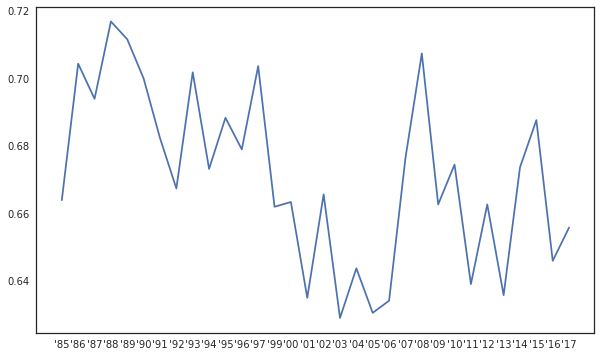

In [43]:
fig = plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.show()